<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/puertas_logicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recreación de las puertas lógicas del paper:

[_Nonlinear delay differential equations and their application to modeling biological network motifs_](https://www.nature.com/articles/s41467-021-21700-8#Fig5)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
def supr(e, n, s):
    return e/(1 + s**n)

In [23]:
# Se declara la variable "t" y "S0", asociadas al eje temporal y las condiciones
start=0; step=0.1; num=2**5*200
t = np.arange(0,num)*step+start

S0 = np.array([0.1, 0.1])

In [24]:
# Se definen las variables booleanas en el continuo, alternando entre 0 y 1 de manera asincrónica
X1 = np.concatenate([np.zeros(num//2), np.ones(num//2)])
X2 = np.concatenate([np.zeros(num//4), np.ones(num//4), np.zeros(num//4), np.ones(num//4)])
X3 = np.concatenate([np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8),
                     np.zeros(num//8), np.ones(num//8), np.zeros(num//8), np.ones(num//8)])
X4 = np.concatenate([np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16),
                     np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16),
                     np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16),
                     np.zeros(num//16), np.ones(num//16), np.zeros(num//16), np.ones(num//16)])
X5 = np.concatenate([np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32),
                     np.zeros(num//32), np.ones(num//32), np.zeros(num//32), np.ones(num//32)])

In [25]:
def RK_solver(S0, evol, t, n, e):
    dims = len(S0)
    K = np.empty([4, dims])
    S = np.empty([len(t)+1, dims])

    for d in range(dims):
        S[0, d] = S0[d]

    dt = t[1] - t[0]
    for i in range(len(t)):
        K[0] = dt * evol(S[i]         , i, n, e)
        K[1] = dt * evol(S[i] + K[0]/2, i, n, e)
        K[2] = dt * evol(S[i] + K[1]/2, i, n, e)
        K[3] = dt * evol(S[i] + K[2]  , i, n, e)
        for d in range(dims):
            S[i+1, d] = S[i, d] + (K[0,d]+2*K[1,d]+2*K[2,d]+K[3,d])/6
    S = S[0:-1,:]
    return S

# Puerta lógica $(Y_1)$: $(\ X_1\ |\ Y_1\ |\ Y_3\ |\ Y_4\ |\ S_3\ )$

In [26]:
def dS_y1(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(1, n, X3[i]) + supr(1, n, X4[i]) + supr(1, n, X5[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


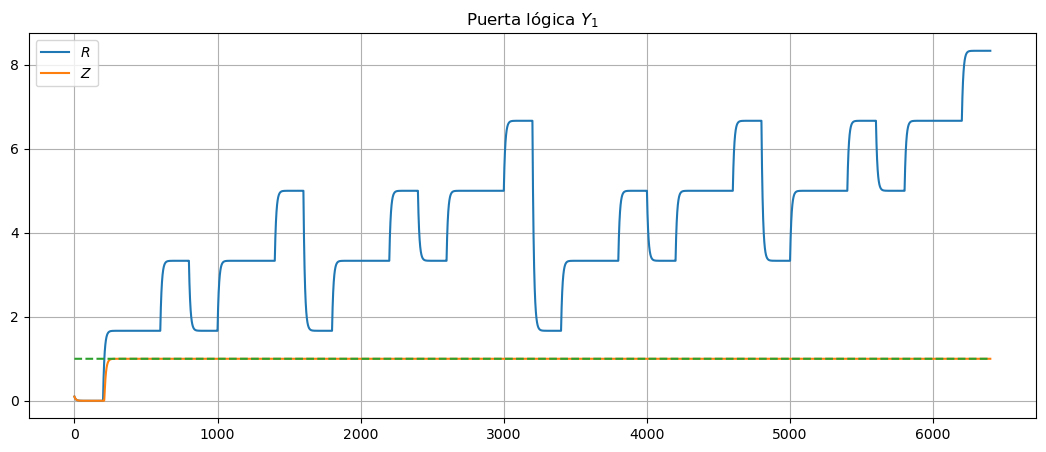

In [27]:
n, e = -6, 1/0.3
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y1, t, n, e)
plt.figure(figsize=(13, 5))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Y_1$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Y_2)$: $\ Y_1\ \&\ (-Y_2)\ \&\ (-Y_3)$

In [28]:
def dS_y2(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) * supr(1, -n, X2[i]) * supr(1, -n, X3[i])) - R
    dZ = supr(1, -10, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)
C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: overflow encountered in scalar power
  return e/(1 + s**n)


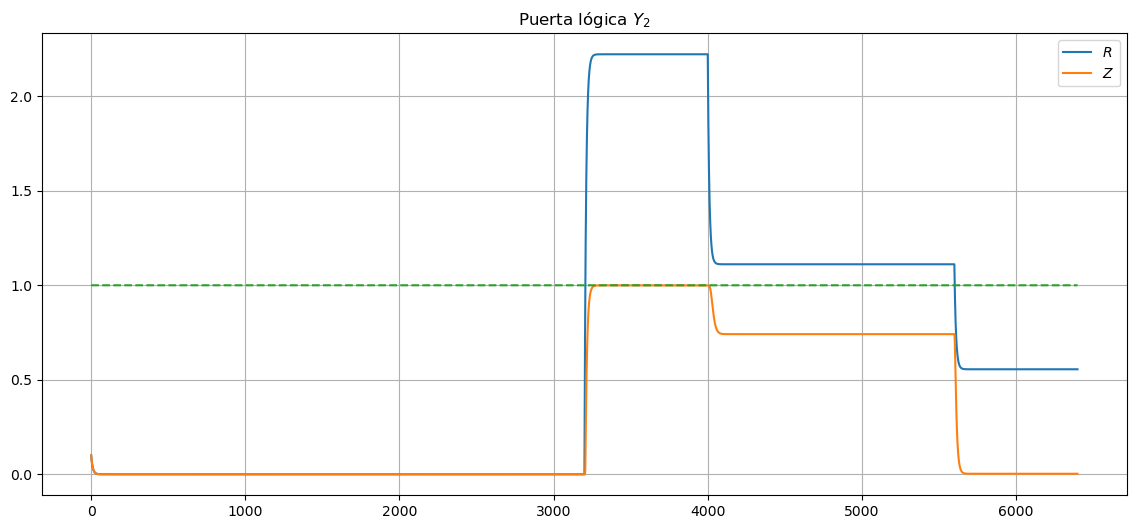

In [29]:
n, e = -4, 1/0.225
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y2, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Y_2$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Y_3)$: $(\ X_2\ |\ Y_1\ )\ \&\ (-Y_2)$

In [30]:
def dS_y3(S, i, n, e):
    R, Z = S
    # dR = e*(supr(1, n, X1[i]) + supr(1, -n, X2[i])) - R
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(2, -n, X3[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


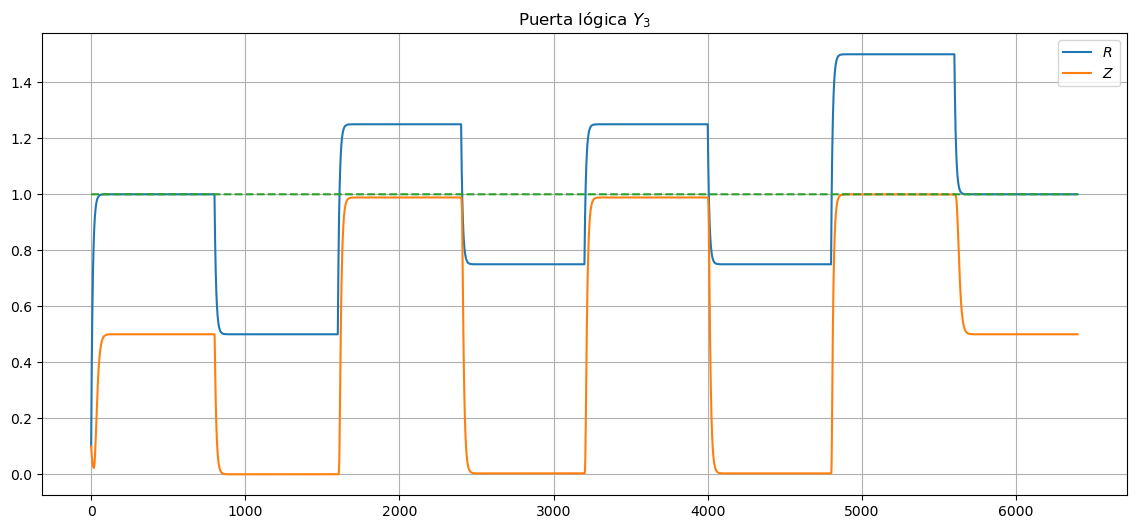

In [31]:
n, e = -2, 1/2
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y3, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Y_3$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Y_4)$: $(\ X_2\ |\ Y_1\ )$

In [32]:
def dS_y4(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)
C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: overflow encountered in scalar power
  return e/(1 + s**n)


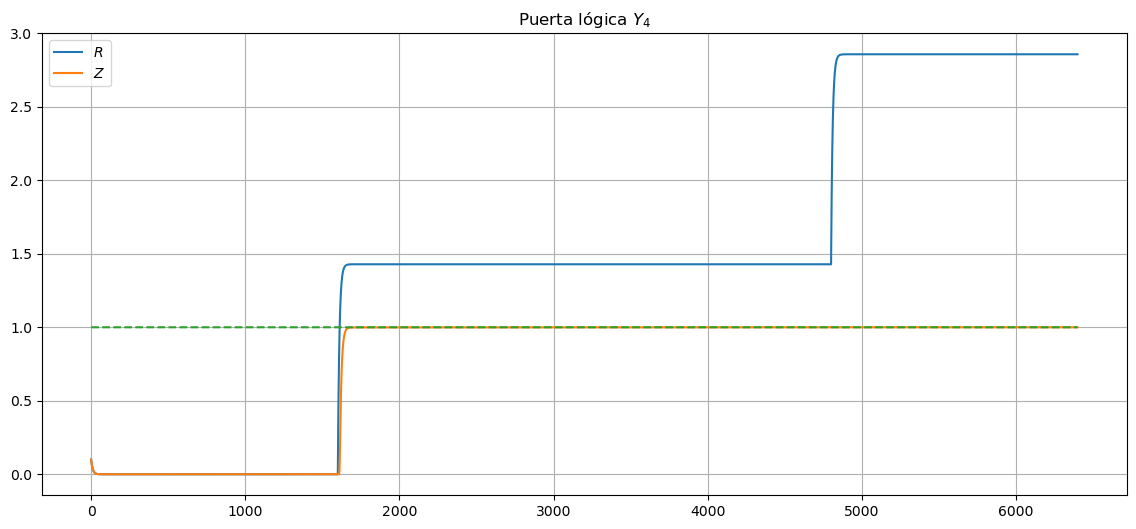

In [33]:
n, e = -2, 1/0.35
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_y4, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Y_4$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Z_2)$: $(-Y_2)\ \&\ Y_4$

In [34]:
def dS_z2(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, -n, X1[i]) + supr(1, n, X2[i])) - R
    # dR = e*(supr(1, -n, X1[i]) * supr(1, n, X2[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


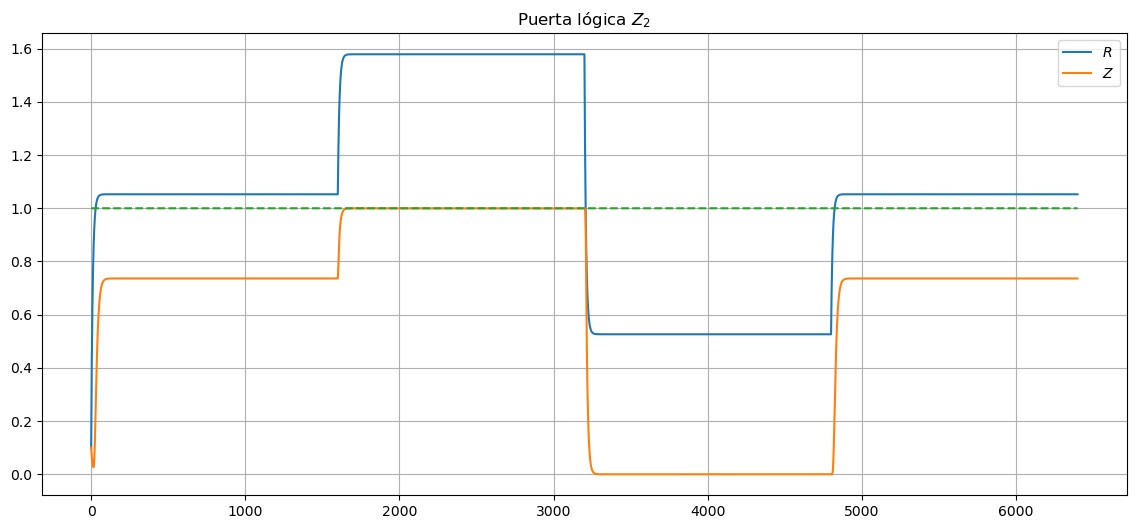

In [35]:
n, e = -2, 1/0.95
# n, e = -6, 1/0.24
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_z2, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--")
plt.title("Puerta lógica $Z_2$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(S_1)$: $(\ S_3 |\ \hat{Y}_1)\ \&\ (-S_2)$

In [36]:
def dS_s1(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(2, -n, X3[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


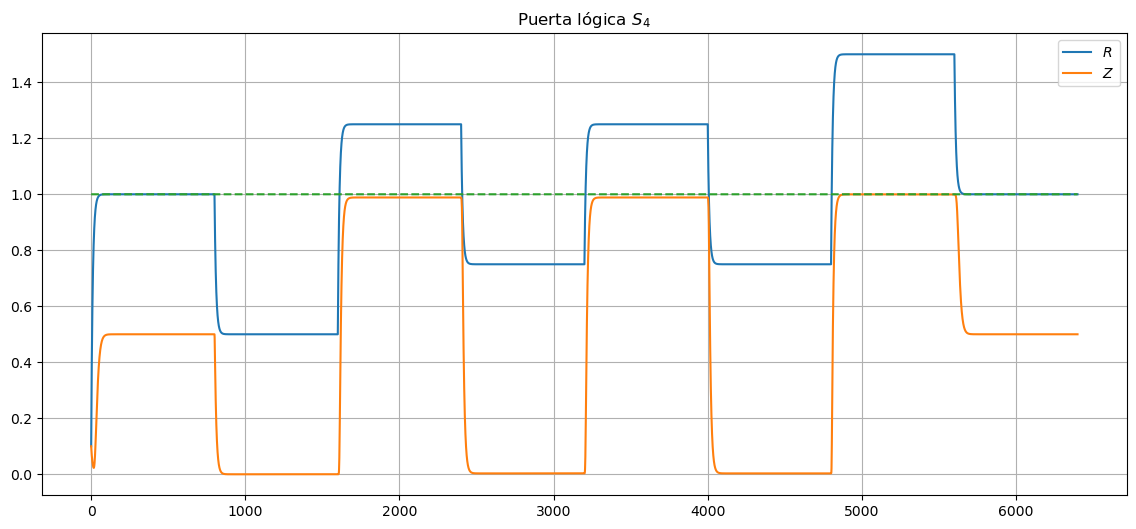

In [37]:
n, e = -6, 1/2
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_s1, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $S_4$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(S_2)$: $-((\ S_2 |\ S_3)\ \&\ (-S_3|\ S_5))$

por leyes de De Morgan se tiene:

$$S_2: (-(\ S_2 \|\ S_3)\ \|\ -(-S_3\|\ S_5))$$

$$S_2: (-S_2\ \&-S_3)\ \|\ (S_3\ \&-S_5)$$

In [38]:
def dS_s2(S, i, n, e):
    R1, Z1, R2, Z2, R, Z = S
    dR1 = e[0]*(supr(1, -n, X1[i]) + supr(1, -n, X2[i])) - R1
    dZ1 = supr(1, -10, R1) - Z1
    dR2 = e[1]*(supr(1, +n, X2[i]) + supr(1, -n, X3[i])) - R2
    dZ2 = supr(1, -10, R2) - Z2
    dR  = e[2]*(supr(1, -20, Z1) + supr(1, -20, Z2)) - R
    dZ  = supr(1, -10, R) - Z
    return np.array([dR1, dZ1, dR2, dZ2, dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


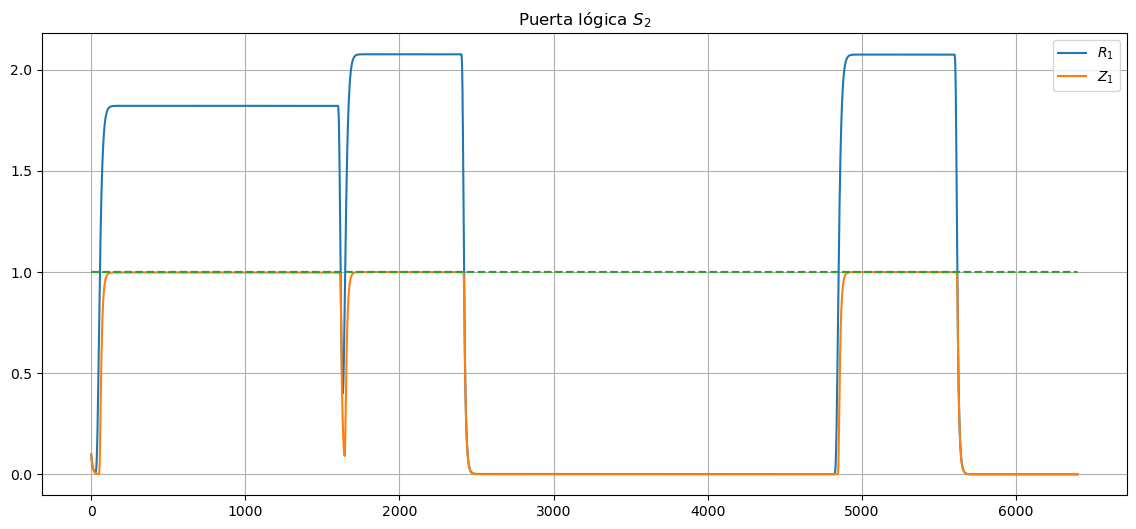

In [39]:
n, e = -6, [1/1.4, 1/1.0, 1/0.2]
labels = ["$R_1$", "$Z_1$", "$R_2$", "$Z_2$", "$R$", "$Z$"]
S0m = np.ones(6)*0.1

Pip = RK_solver(S0m, dS_s2, t, n, e)
plt.figure(figsize=(14,6))
for i in range(2):
    plt.plot(Pip[:,i+4], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $S_2$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(S_3)$: $(-S_2)\ \&\ Y_1$

In [40]:
def dS_s3(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, -n, X2[i])) - R
    dZ = supr(1, -20, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


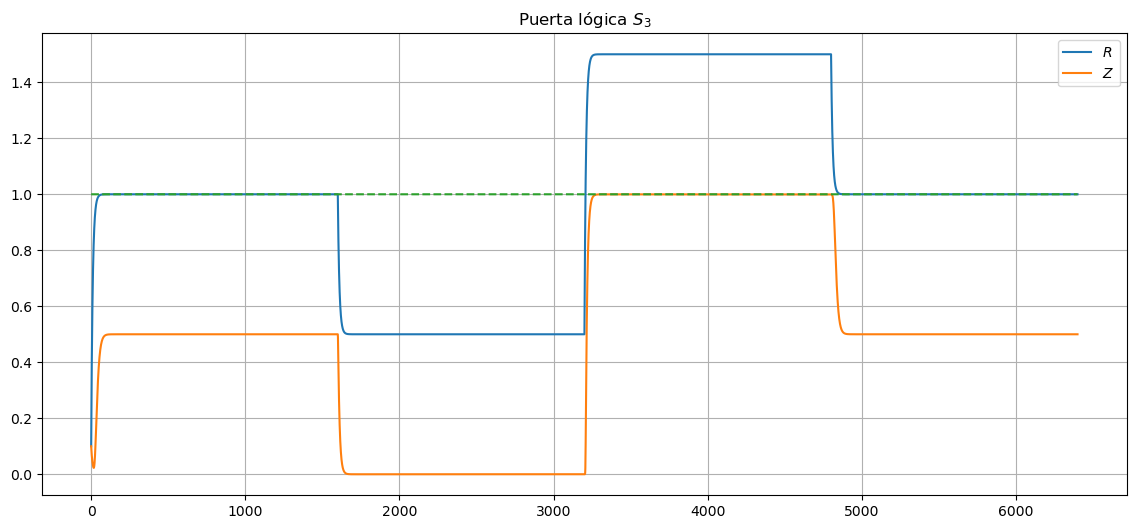

In [41]:
n, e = -2, 1/1
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_s3, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $S_3$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Z_3)$: $(-S_3\ )\ \&\ (\ S_2\ |-S_4\ )\ \&\ (-Z_3\ )$

In [42]:
def dS_z3(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, -n, X1[i]) * (supr(1, n, X2[i]) + supr(1, -n, X3[i])) * supr(1, -n, X4[i])) - R
    dZ = supr(1, -10, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


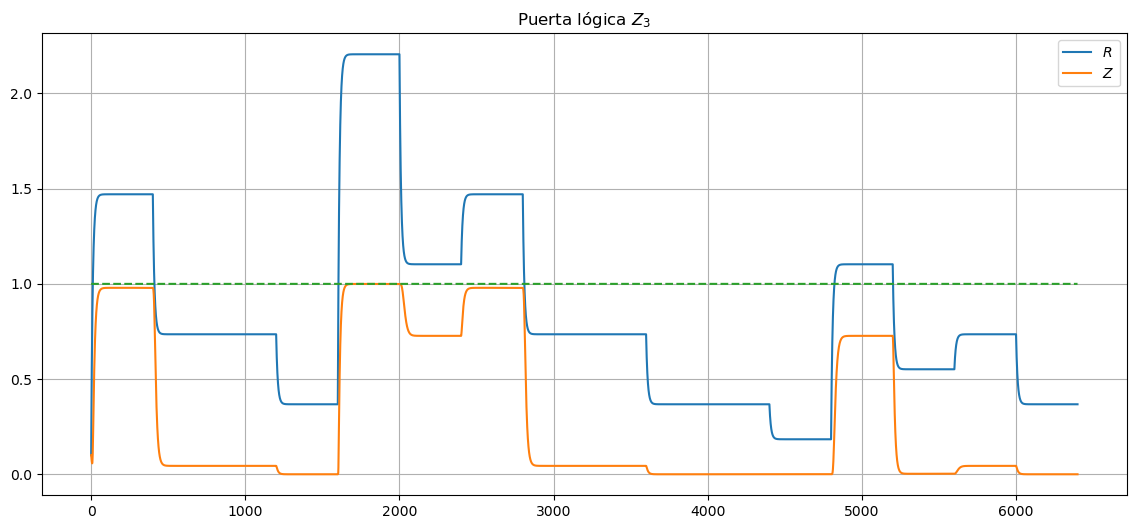

In [43]:
n, e = -6, 1/0.68
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_z3, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $Z_3$"); plt.legend(); plt.grid(); plt.show()

# Puerta lógica $(Z_4)$: $(\hat{Y_1})\,\&\left(S_3\right)\&\left(-S_4\right)$

In [44]:
def dS_z4(S, i, n, e):
    R, Z = S
    dR = e*(supr(1, n, X1[i]) + supr(1, n, X2[i]) + supr(1, -n, X3[i])) - R
    dZ = supr(1, -10, R) - Z
    return np.array([dR, dZ])

C:\Users\joshx\AppData\Local\Temp\ipykernel_60776\1441905894.py:2: RuntimeWarning: divide by zero encountered in scalar power
  return e/(1 + s**n)


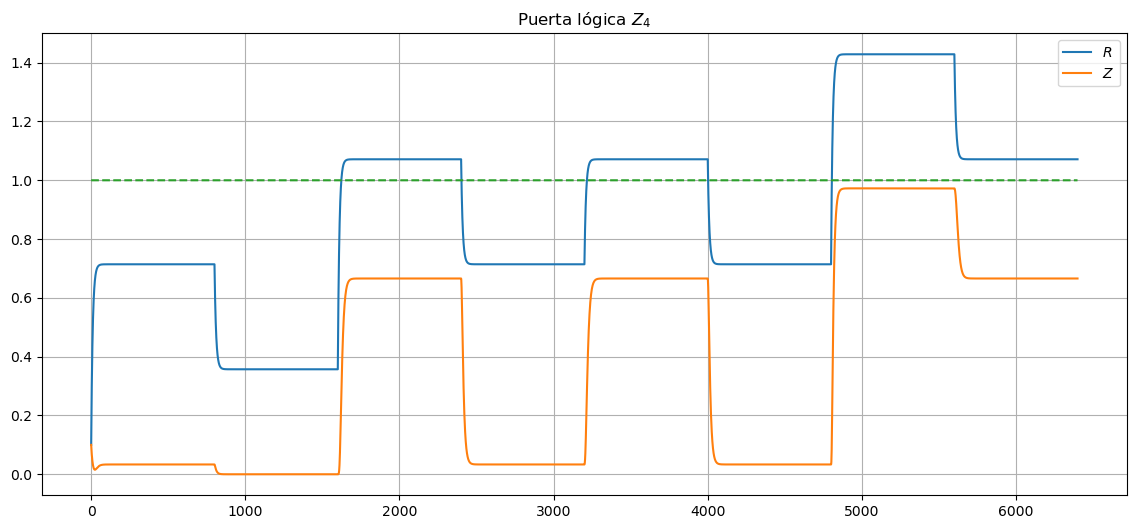

In [45]:
n, e = -6, 1/1.4
labels = ["$R$", "$Z$"]

Pip = RK_solver(S0, dS_z4, t, n, e)
plt.figure(figsize=(14,6))
for i in range(len(Pip[0])):
    plt.plot(Pip[:,i], label=labels[i])
plt.plot(X1*0 + 1, "--"); plt.title("Puerta lógica $Z_4$"); plt.legend(); plt.grid(); plt.show()